In [1]:
print("Hello world")

Hello world


In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn

In [22]:
# Task 1a
sindf = pd.read_csv("./sinusoidal.csv")
sindf.sort_values(by=['X'],inplace=True)
# sindf

In [23]:
sindf.isnull().sum()

X    0
y    0
dtype: int64

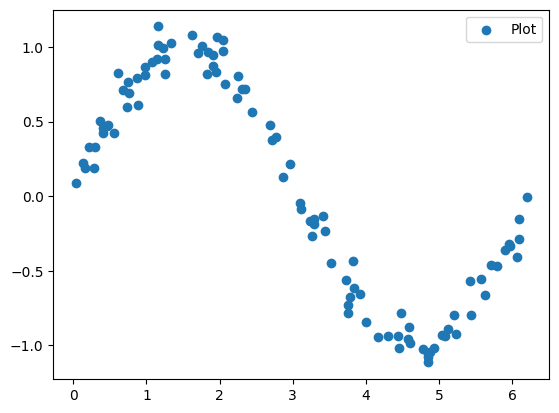

In [24]:
from matplotlib import pyplot as plt

X = np.array(sindf['X'])
y = np.array(sindf['y'])

plt.scatter(X, y, label = "Plot")
plt.legend()

In [25]:
"""
    From plot it is clear that a 3rd degree polynomial is suitable
"""

X1 = np.array([])
ones = np.ones((len(sindf['X']), 1))

sq = np.array([i**2 for i in X])
cube = np.array([i**3 for i in X])
X1 = np.column_stack((ones, X, sq, cube))
X1

array([[1.00000000e+00, 3.46964852e-02, 1.20384608e-03, 4.17692278e-05],
       [1.00000000e+00, 1.29336192e-01, 1.67278506e-02, 2.16351650e-03],
       [1.00000000e+00, 1.59713084e-01, 2.55082691e-02, 4.07400432e-03],
       [1.00000000e+00, 2.16069451e-01, 4.66860075e-02, 1.00874200e-02],
       [1.00000000e+00, 2.84171437e-01, 8.07534057e-02, 2.29478114e-02],
       [1.00000000e+00, 2.91856551e-01, 8.51802462e-02, 2.48604128e-02],
       [1.00000000e+00, 3.64950099e-01, 1.33188574e-01, 4.86071834e-02],
       [1.00000000e+00, 3.99348893e-01, 1.59479538e-01, 6.36879769e-02],
       [1.00000000e+00, 4.08731213e-01, 1.67061205e-01, 6.82831289e-02],
       [1.00000000e+00, 4.65236268e-01, 2.16444785e-01, 1.00697964e-01],
       [1.00000000e+00, 4.68415509e-01, 2.19413089e-01, 1.02776494e-01],
       [1.00000000e+00, 5.56014789e-01, 3.09152445e-01, 1.71893332e-01],
       [1.00000000e+00, 6.13691992e-01, 3.76617861e-01, 2.31127365e-01],
       [1.00000000e+00, 6.77901829e-01, 4.59550890e

In [26]:
beta = np.linalg.inv(X1.T @ X1) @ X1.T @ y
beta

array([-0.14978571,  1.84923393, -0.8663481 ,  0.09248753])

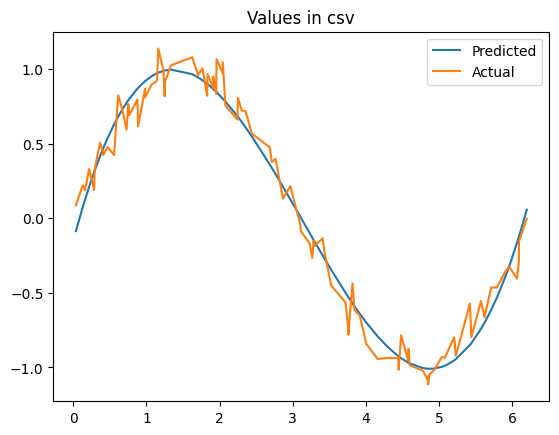

In [31]:
pred = np.array([beta[0] + beta[1] * i + beta[2] * i ** 2 + beta[3] * i ** 3 for i in X])

plt.title("Values in csv")
plt.plot(X, pred, label = "Predicted")
plt.plot(X, y, label = "Actual")
plt.legend()

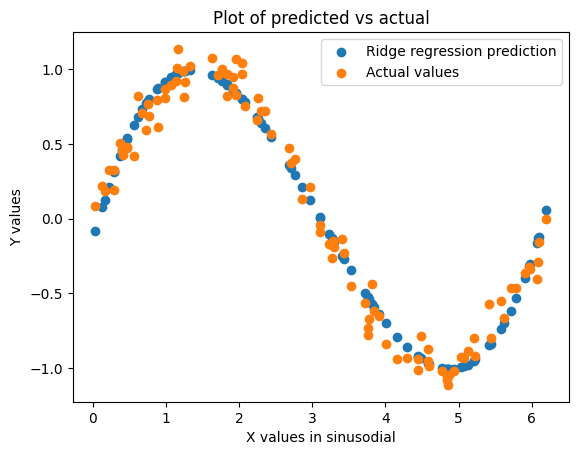

In [28]:
from sklearn.linear_model import ridge_regression

coef = ridge_regression(X1, y, alpha=0.01)

pred = np.array([coef[0] + coef[1] * i + coef[2] * i**2 + coef[3]* i**3 for i in X])
plt.scatter(X, pred, label = "Ridge regression prediction")
plt.scatter(X, y, label = "Actual values")
plt.title("Plot of predicted vs actual")
plt.xlabel("X values in sinusodial")
plt.ylabel("Y values")
plt.legend()

In [29]:
mse = mean_squared_error(pred, y)
mse

NameError: name 'mean_squared_error' is not defined

In [30]:
# Task 1b
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

ridge = linear_model.Ridge(alpha = 0.01)

test = cross_val_score(ridge, copyX, y, cv=5)

avgScore = np.average(test)
avgScore

NameError: name 'copyX' is not defined

In [192]:
#2a, 2b Custom impl of 5 fold cross validation
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_squared_error as MSE

def getPredicted(degree, xtrain, coef):
    x = np.ones((len(xtrain), 1))
    for h in range(degree):
        x += np.array([coef[h] * i for i in xtrain])

    return x

def fiveCrossValid(copyX, y, degree, alpha, trainFlag):
    x5train = []
    x5test = []
    y5train = []
    y5test = []
    
    pred5train = []
    pred5test = []
    
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(copyX, y, test_size=0.33)
        x5train.append(X_train)
        x5test.append(X_test)
        y5test.append(y_test)
        y5train.append(y_train)
    
    x5train = np.array(x5train)
    x5test = np.array(x5test)
    y5train = np.array(y5train)
    y5test = np.array(y5test)
    
    
    
    mseScores = []
    
    for i in range(5):
        if trainFlag:
            ones = np.ones((len(x5train[i]), 1))
            x2 = ones
            for k in range(1, degree + 1):
                t = np.array([h ** k for h in x5train[i]])
                x2 = np.column_stack((x2, t))
            
            coef = ridge_regression(x2, y5train[i], alpha = alpha)

        
        # g = np.array([coef[0] + coef[1] * i + coef[2] * i**2 + coef[3]* i**3 for i in x5train[i]])
        

            g = getPredicted(degree, x5train[i], coef)
            ms = MSE(g, y5train[i])
        # print(coef, i)
        else:
            ones = np.ones((len(x5test[i]), 1))
            x2 = ones
            for k in range(1, degree + 1):
                t = np.array([h ** k for h in x5test[i]])
                x2 = np.column_stack((x2, t))
            
            coef = ridge_regression(x2, y5test[i], alpha = alpha)
            g = getPredicted(degree, x5test[i], coef)
            ms = MSE(g, y5test[i])

        
        mseScores.append(ms)

    return np.array(mseScores)
# mseScores = fiveCrossValid(copyX, y, 3)
# mseScores
ms2 = fiveCrossValid(copyX, y, 3, 0.01, True)
ms2
avg = np.average(ms2)
avg

16.744020105480654

In [193]:
#2c Analysis
sk_cv5 = test
own_cv5 = np.array(ms2)
sk_cv5, own_cv5

sk_cv51 = np.average(sk_cv5)
own_cv51 = np.average(own_cv5)

sk_cv51, own_cv51

(0.6141501790103993, 16.744020105480654)

In [194]:
# Sklearn's model is more accurate than my own

In [196]:
alpha = [0.01, 0.1, 1, 10, 100]
degrees = [1, 2, 3, 4, 5]

allCV = {}
for i in range(5):
    for j in range(5):
        cv = fiveCrossValid(copyX, y, degrees[i], alpha[j], 1)
        mean = np.average(cv)
        
        allCV[mean] = [degrees[i], alpha[j]]
# np.array(allCV)
it = list(allCV.items())
it.sort()

bestVal = it[0][0]
deg1 = it[0][1][0]
alpha1 = it[0][1][1]
it

[(2.6763290749479935, [1, 100]),
 (2.987892043094841, [3, 100]),
 (3.656928089677558, [2, 100]),
 (4.44728061522821, [5, 100]),
 (4.63300484350909, [4, 100]),
 (7.939595043146864, [2, 10]),
 (10.04095761175352, [3, 10]),
 (10.428111460690369, [2, 1]),
 (10.954410269623782, [1, 10]),
 (11.371163663730623, [4, 10]),
 (11.857020188981126, [2, 0.1]),
 (12.192501294179213, [5, 10]),
 (12.503336257587593, [2, 0.01]),
 (14.900541537291542, [4, 1]),
 (15.3136595804386, [3, 1]),
 (16.13288203114442, [3, 0.1]),
 (16.406224813129437, [3, 0.01]),
 (16.57603236831134, [5, 1]),
 (16.697892833558107, [5, 0.01]),
 (17.88222024692349, [5, 0.1]),
 (18.361974348300766, [4, 0.1]),
 (19.16933229041585, [1, 0.01]),
 (19.325179064869275, [4, 0.01]),
 (19.72972757195256, [1, 1]),
 (20.581938760697774, [1, 0.1])]

In [197]:
# retrain = ridge_regression(x2, y5train[i], alpha = alpha)
mseTest = fiveCrossValid(copyX, y, deg1, alpha1, 0)
mseTrain = fiveCrossValid(copyX, y, deg1, alpha1, 1)
mseTest, mseTrain



(array([2.05474309, 1.84803692, 1.9318593 , 2.1678608 , 1.98889746]),
 array([2.65738012, 2.63375739, 2.73027502, 2.7676041 , 2.88420772]))